In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

import os
import joblib
import tensorflow as tf
from numpy.random import seed
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras.models import Sequential
from keras import regularizers


Using TensorFlow backend.


In [3]:
df = pd.read_excel('forecast1.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54106 entries, 0 to 54105
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     54106 non-null  datetime64[ns]
 1   Surface_Temp  54106 non-null  object        
 2   GII           54106 non-null  object        
 3   Rainfall      54106 non-null  object        
 4   Wind_Speed    54106 non-null  object        
 5   Actual_Power  54106 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.5+ MB


In [5]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Timestamp"]).dt.month
dataset["Year"] = pd.to_datetime(df["Timestamp"]).dt.year
dataset["Date"] = pd.to_datetime(df["Timestamp"]).dt.date
dataset["Time"] = pd.to_datetime(df["Timestamp"]).dt.time
dataset["Week"] = pd.to_datetime(df["Timestamp"]).dt.week
dataset["Day"] = pd.to_datetime(df["Timestamp"]).dt.day_name()
dataset = df.set_index("Timestamp")
dataset.index = pd.to_datetime(dataset.index)
dataset.head()

,Surface_Temp,GII,Rainfall,Wind_Speed,Actual_Power,Month,Year,Date,Time,Week,Day
Timestamp,,,,,,,,,,,
2020-02-20 11:24:41,27.9736824,217.239548,0.0,4.51822472,24575.2637,2,2020,2020-02-20,11:24:41,8,Thursday
2020-02-20 11:29:41,27.5367813,191.8407,0.0,4.390662,22755.5400,2,2020,2020-02-20,11:29:41,8,Thursday
2020-02-20 11:34:41,27.3630924,186.683365,0.0,3.03255153,21484.5020,2,2020,2020-02-20,11:34:41,8,Thursday
2020-02-20 11:39:41,26.983429,179.632233,0.0,1.89119709,20339.6289,2,2020,2020-02-20,11:39:41,8,Thursday
2020-02-20 11:44:41,26.4996357,165.123489,0.0,3.88063741,18821.7715,2,2020,2020-02-20,11:44:41,8,Thursday


In [6]:
dataset.head()

,Surface_Temp,GII,Rainfall,Wind_Speed,Actual_Power,Month,Year,Date,Time,Week,Day
Timestamp,,,,,,,,,,,
2020-02-20 11:24:41,27.9736824,217.239548,0.0,4.51822472,24575.2637,2,2020,2020-02-20,11:24:41,8,Thursday
2020-02-20 11:29:41,27.5367813,191.8407,0.0,4.390662,22755.5400,2,2020,2020-02-20,11:29:41,8,Thursday
2020-02-20 11:34:41,27.3630924,186.683365,0.0,3.03255153,21484.5020,2,2020,2020-02-20,11:34:41,8,Thursday
2020-02-20 11:39:41,26.983429,179.632233,0.0,1.89119709,20339.6289,2,2020,2020-02-20,11:39:41,8,Thursday
2020-02-20 11:44:41,26.4996357,165.123489,0.0,3.88063741,18821.7715,2,2020,2020-02-20,11:44:41,8,Thursday


No handles with labels found to put in legend.


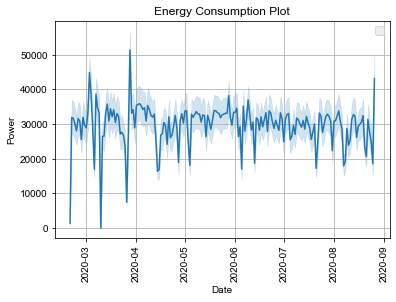

In [7]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Date"], y=dataset["Actual_Power"], data=df)
sns.set(rc={'figure.figsize':(16,8)})

plt.title("Power Generated")
plt.xlabel("Date")
plt.ylabel("Power")
plt.grid(True)
plt.legend();

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption Plot");

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54106 entries, 0 to 54105
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     54106 non-null  datetime64[ns]
 1   Surface_Temp  54106 non-null  object        
 2   GII           54106 non-null  object        
 3   Rainfall      54106 non-null  object        
 4   Wind_Speed    54106 non-null  object        
 5   Actual_Power  54106 non-null  float64       
 6   Month         54106 non-null  int64         
 7   Year          54106 non-null  int64         
 8   Date          54106 non-null  object        
 9   Time          54106 non-null  object        
 10  Week          54106 non-null  int64         
 11  Day           54106 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 5.0+ MB


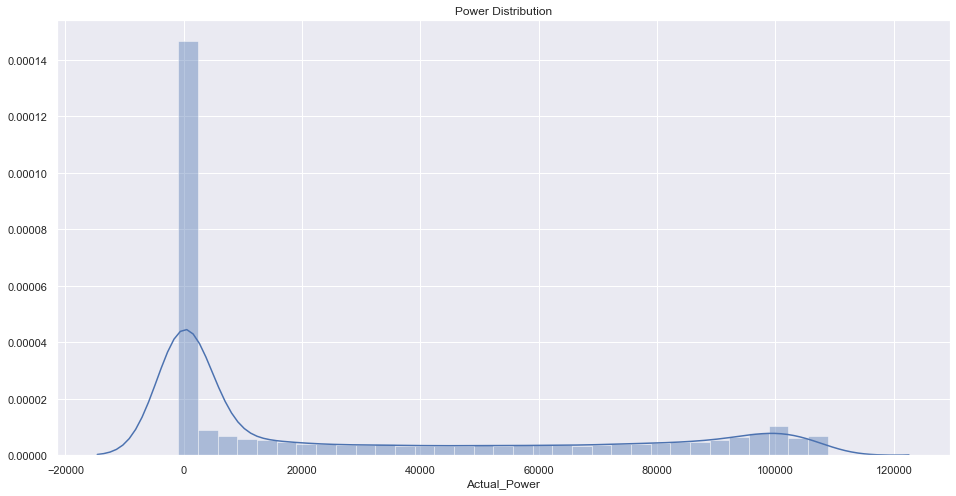

In [9]:
sns.distplot(dataset["Actual_Power"])
plt.title("Power Distribution");

In [10]:
pd.plotting.register_matplotlib_converters()

No handles with labels found to put in legend.


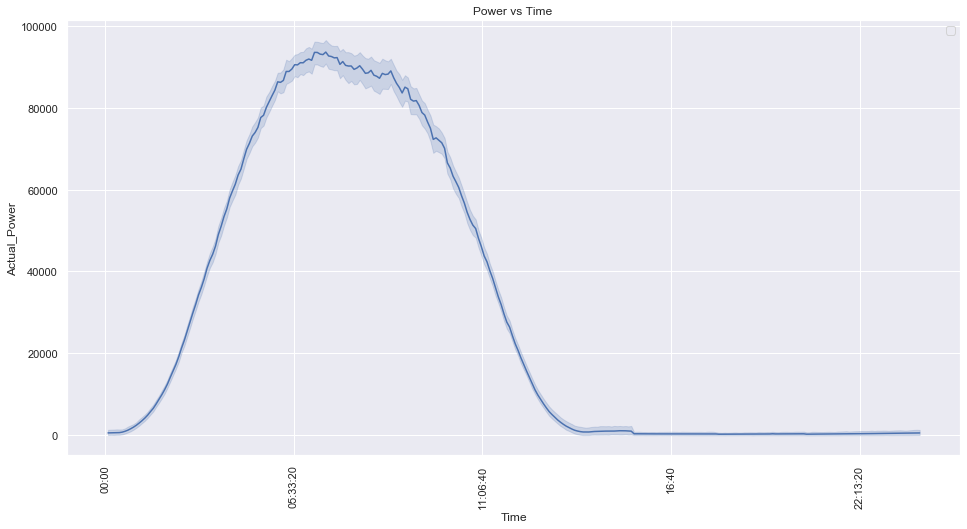

In [11]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Time"],y=dataset["Actual_Power"], data=df)
plt.title("Power vs Time ")

plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# Resampling Measures

In [12]:
NewDataSet = dataset.resample('H').mean()

In [13]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (54106, 11)
New  Dataset  (4510, 4)


# Train-Test Data Split

In [14]:



TestData = NewDataSet.tail(100).iloc[:,0:1]

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-80]

In [19]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)


Training Set Shape  (4430, 1)
Test Set Shape  (100, 1)


# Model Building

In [16]:
from sklearn.preprocessing import MinMaxScaler


In [17]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [15]:
X_Train = []
Y_Train = []

# Range should be fromm 100 Values to END 
for i in range(100, Train.shape[0]):
    
    # X_Train 0-100 
    X_Train.append(Train[i-20:i])  ##20 || 10
    
    # Y Would be 100th Value based on past 100 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4330, 20, 1)
(4330, 1)


In [16]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4330, 20, 1)

In [17]:
regressor = Sequential()


regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#output layer
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("forecast", monitor="loss", verbose=1, save_best_only=True, save_weights_only=True, mode="min")
stop = EarlyStopping(monitor="loss", patience=5, mode="min")

In [19]:
#regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)


nb_epochs =50
batch_size = 32
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
#mc = ModelCheckpoint('LSTM_POA_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = regressor.fit(X_Train, Y_Train, epochs=nb_epochs, batch_size=batch_size,validation_split=0.05,callbacks=[checkpoint,stop]).history

Train on 4113 samples, validate on 217 samples
Epoch 1/50
4113/4113 [==============================] - 21s 5ms/step - loss: 0.0618 - val_loss: 0.0304

Epoch 00001: loss improved from inf to 0.06182, saving model to forecast
Epoch 2/50
4113/4113 [==============================] - 18s 4ms/step - loss: 0.0341 - val_loss: 0.0136

Epoch 00002: loss improved from 0.06182 to 0.03406, saving model to forecast
Epoch 3/50
4113/4113 [==============================] - 18s 4ms/step - loss: 0.0221 - val_loss: 0.0106

Epoch 00003: loss improved from 0.03406 to 0.02206, saving model to forecast
Epoch 4/50
4113/4113 [==============================] - 17s 4ms/step - loss: 0.0194 - val_loss: 0.0100

Epoch 00004: loss improved from 0.02206 to 0.01936, saving model to forecast
Epoch 5/50
4113/4113 [==============================] - 18s 4ms/step - loss: 0.0181 - val_loss: 0.0091

Epoch 00005: loss improved from 0.01936 to 0.01809, saving model to forecast
Epoch 6/50
4113/4113 [==============================

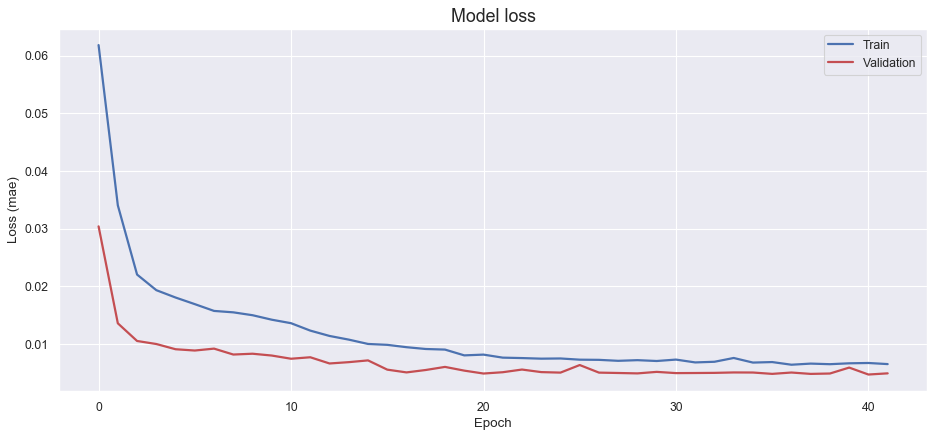

In [20]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [21]:
NewDataSet.head()

,Actual_Power,Month,Year,Week
Timestamp,,,,
2020-02-20 11:00:00+00:00,19210.339638,2,2020,8
2020-02-20 12:00:00+00:00,5327.578662,2,2020,8
2020-02-20 13:00:00+00:00,-107.629819,2,2020,8
2020-02-20 14:00:00+00:00,-120.036232,2,2020,8
2020-02-20 15:00:00+00:00,-118.325831,2,2020,8


In [29]:
print(TestData.shape)

print(NewDataSet.shape)

(100, 1)
(4510, 4)


In [30]:
Df_Total = pd.concat((NewDataSet[["Actual_Power"]], TestData[["Actual_Power"]]), axis=0)



In [31]:
Df_Total

,Actual_Power
Timestamp,
2020-02-20 11:00:00+00:00,19210.339638
2020-02-20 12:00:00+00:00,5327.578662
2020-02-20 13:00:00+00:00,-107.629819
2020-02-20 14:00:00+00:00,-120.036232
2020-02-20 15:00:00+00:00,-118.325831
...,...
2020-08-26 04:00:00+00:00,55132.220675
2020-08-26 05:00:00+00:00,72366.318175
2020-08-26 06:00:00+00:00,88525.892975


In [32]:
print(Df_Total.shape)

inputs = Df_Total[len(Df_Total) - len(TestData) - 20:].values
print(inputs.shape)

(4610, 1)
(120, 1)


In [33]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 20:].values

# Reshape
inputs = inputs.reshape(-1,1)

# transform 
inputs = sc.transform(inputs)

X_test = []
for i in range(20, 120):
    X_test.append(inputs[i-20:i])
    

X_test = np.array(X_test)

# Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted = regressor.predict(X_test)


predicted = sc.inverse_transform(predicted)

In [34]:
True_Power = TestData["Actual_Power"].to_list()
Predicted_Power  = predicted
dates = TestData.index.to_list()

In [35]:
ML_Func = pd.DataFrame(data={
    "Date":dates,
    "True Power": True_Power,
    "Predicted Power":[x[0] for x in Predicted_Power ]
})

In [36]:
ML_Func

,Date,True Power,Predicted Power
0,2020-08-22 05:00:00+00:00,95983.760708,44822.246094
1,2020-08-22 06:00:00+00:00,89799.291192,80072.281250
2,2020-08-22 07:00:00+00:00,102836.118750,57111.910156
3,2020-08-22 08:00:00+00:00,95032.570033,77893.796875
4,2020-08-22 09:00:00+00:00,88810.285133,59281.050781
...,...,...,...
95,2020-08-26 04:00:00+00:00,55132.220675,51214.953125
96,2020-08-26 05:00:00+00:00,72366.318175,76618.812500
97,2020-08-26 06:00:00+00:00,88525.892975,84706.539062
98,2020-08-26 07:00:00+00:00,78248.595675,92575.187500


In [37]:
True_Power = TestData["Actual_Power"].to_list()
Predicted_Power  = [x[0] for x in Predicted_Power ]
dates = TestData.index.to_list()

No handles with labels found to put in legend.


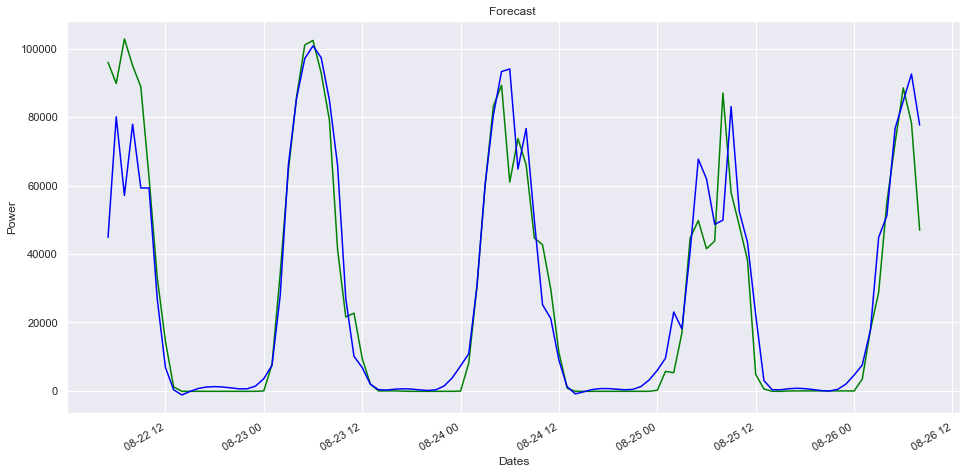

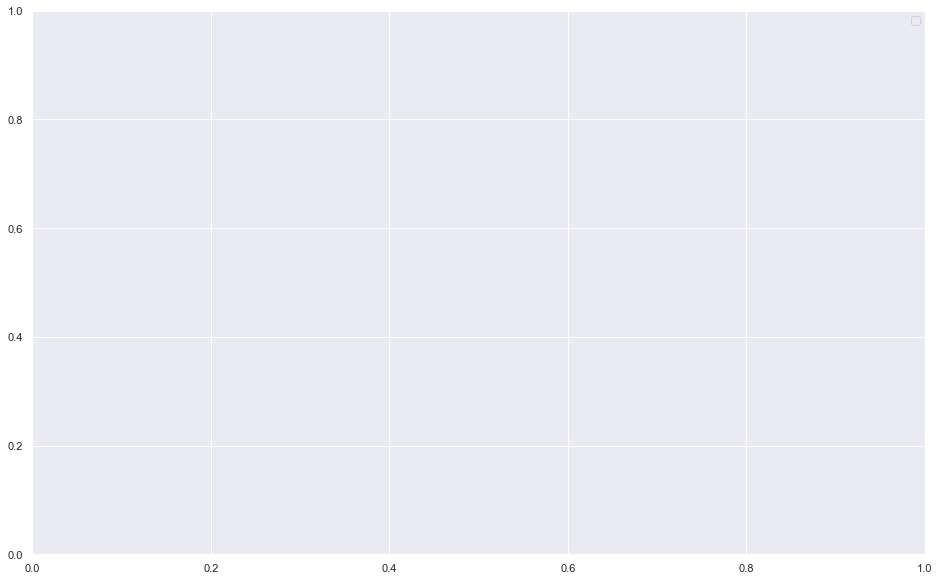

In [38]:
fig = plt.figure();

ax1= fig.add_subplot(111)

x = dates
y = True_Power

y1 = Predicted_Power

plt.plot(x,y, color="green")
plt.plot(x,y1, color="blue")
 #beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power")
plt.title("Forecast ")
plt.figure(figsize=(16,10));
plt.legend()